In [9]:
import numpy as np
import pandas as pd

from tools.agency import Agency
from tools.model import Model

In [10]:
def sample_p(K, V):
    
    p = np.abs(np.random.randn(K,V))
    step = 1 + V//K
    
    for k in range(K):
        i_min = max(k*step-1, 0)
        i_max = min((k+1)*step+1, V)
        ind = np.arange(i_min, i_max)
        p[k][ind] += 4 

    p = np.array([np.array(p[k])/np.sum(p[k]) for k in range(K)])
    
    return p

def sample_nu(K, H):
    
    nu = np.abs(np.random.randn(K,H))
    step = 1 + H//K

    for k in range(K):
        i_min = max(k*step-2, 0)
        i_max = min((k+1)*step+1, H)
        ind = np.arange(i_min, i_max)
        nu[k][ind] += 8

    nu = np.array([np.array(nu[i])/np.sum(nu[i]) for i in range(K)])
    
    return nu

def sample_pi(H, VV):
    
    pi = 0.1 * np.ones((H,VV))
    step = VV//H
        
    for h in range(H):
        i_min = max(h*step, 0)
        i_max = min((h+1)*step, VV)
        if h == H-1:
            i_max = VV
        ind = np.arange(i_min, i_max)
        pi[h][ind] = 0.7

    return pi

In [11]:
# Parameters for simulating

n = 200
V = 15
K = 4
H = 10

# Sample p

p = sample_p(K,V)

# Sample nu

nu = sample_nu(K, H)

# Sample pi

pi = sample_pi(H, V*(V-1)//2)

In [12]:
# Create model

model = Model(V)
model.generate_model(n, K = 4, p = p, nu = nu, pi=pi)

CLUSTER 1
Number of agencies: 50


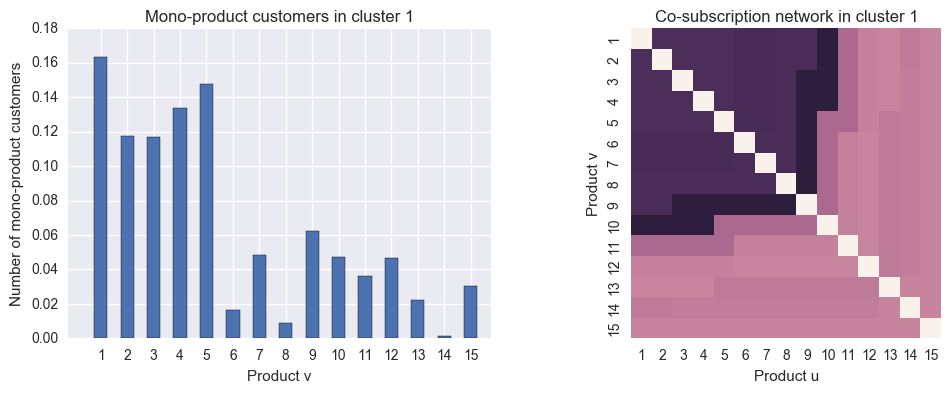

CLUSTER 2
Number of agencies: 50


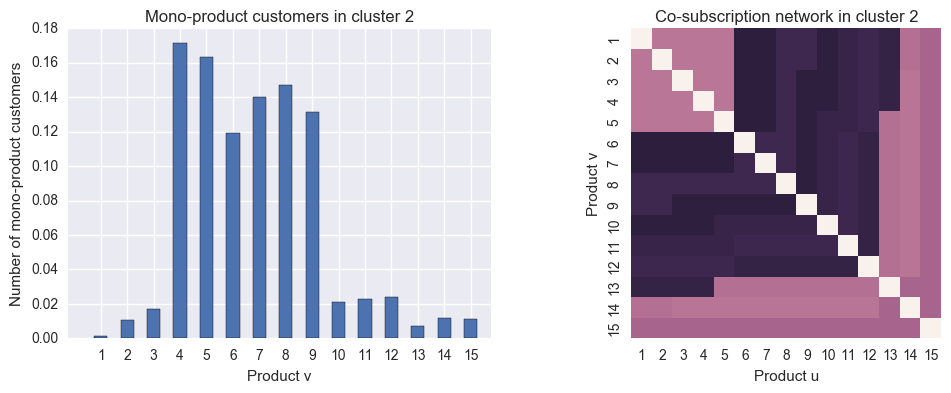

CLUSTER 3
Number of agencies: 50


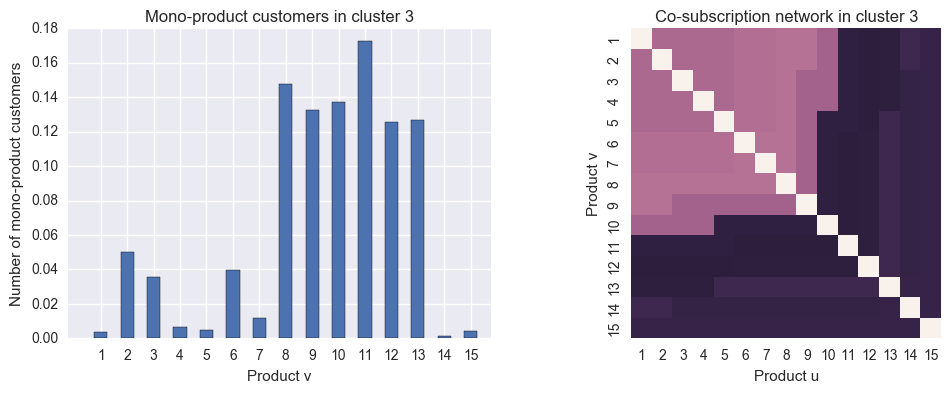

CLUSTER 4
Number of agencies: 50


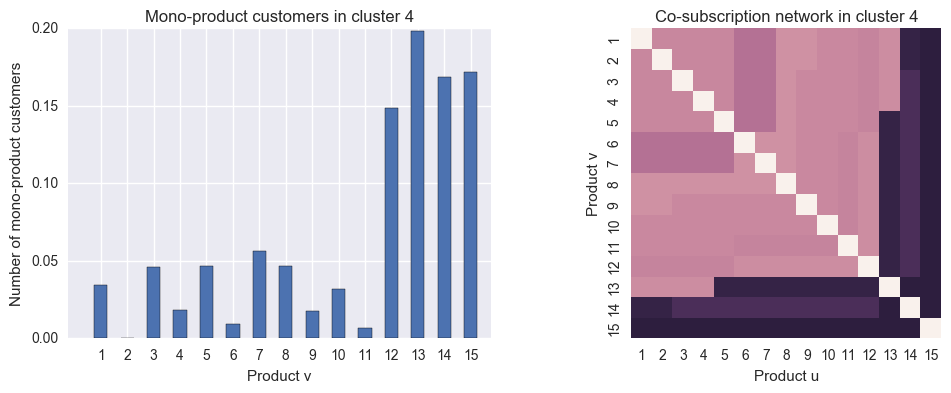

In [13]:
model.plot()

In [14]:
model.generate_agencies()

AGENCY
Number V of products: 15
Number of mono-product customers: 50
Belongs to cluster: 1
Belongs to distribution: 3


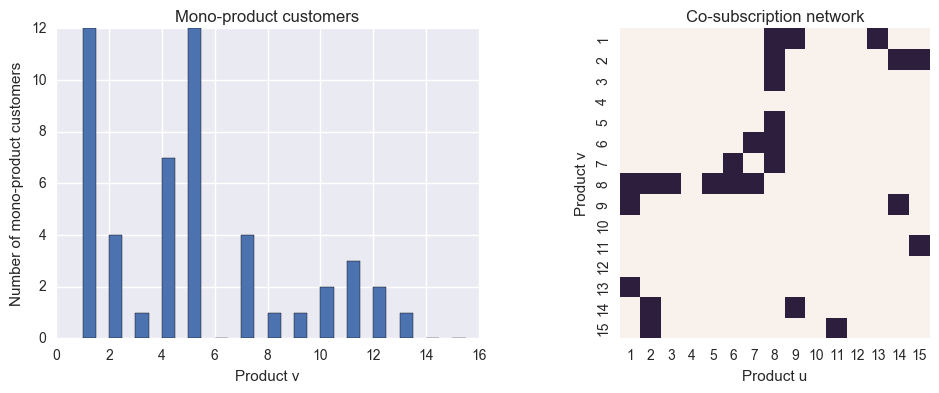

In [15]:
model.agencies[0].plot()

In [16]:
pd.to_pickle(model.agencies, "data/data_simulated")